<a href="https://colab.research.google.com/github/dorsaalh/Spikey_Neurons_Simulation/blob/main/Adaptive_ELIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint

In [ ]:
T       =   100.000             
dt      =   0.005                   
time    =   np.arange(0, T+dt, dt)      
R       =    120
t_m     =    100
t_w     =    100
u_rest  =    -70
delta_t =    0.3
I       =    np.zeros(len(time))
W     =    np.zeros(len(time)+1)
U       =    np.empty(len(time)+1)
firing_threshold = -60
u_reset = -50
a = 0.5
b = 0.001

In [ ]:
def init_variables():
    global I      
    I = np.zeros(len(time))
    global U 
    U = np.empty(len(time)+1)
    global W
    W = np.zeros(len(time)+1)

In [ ]:
def enter_I(start_time, end_time, I_input):
    start  = int(start_time/dt)
    end = int(end_time/dt)
    n = int(T/dt)
    
    if start > n:
        start = n+1
        
    if end > n:   
      end = n+1
    
    I[start:end]  =  I[start:end] + I_input

In [ ]:
def simulate(): 
  global W
  global U
  sum = 0
  spike_counter =0
  U[0] = u_rest
  W[0] = 0  

  for i,t in enumerate(time):
    W[i+1] = W[i] + ( (dt/t_w)* ( (a *(U[i]-u_rest)) - W[i] + (b *t_w * spike_counter) )  )
    U[i+1] = U[i]+ ( (dt/t_m)* ( (R*I[i])- (U[i]-u_rest) -(R* W[i] )+( delta_t * np.exp( (U[i]- firing_threshold)/delta_t ) ) ) )
    
    if U[i+1] > u_reset :
      U[i+1] = u_rest
      spike_counter = spike_counter +1
    elif U[i+1] < -100:
      U[i+1] = -100
    
      

In [ ]:
def make_dataframe():
    data = pd.DataFrame(data = {'u': U[0:U.size - 1] , 'time':time , 'I':I , 'W':W[0:W.size - 1] })
    data['u'] = data['u'].round(4)
    data = data.set_index('time')
    return data

In [ ]:
def plot(data):
    
    fig, axes = plt.subplots(nrows=0, ncols=0,figsize=(25,15))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line', y='u', color='red' ,title = 'U-time', figsize=(15,5)).set_ylabel('U(t)')  
    plt.axhline(y=firing_threshold, color='black', linestyle='--')
    plt.axhline(y=u_reset, color='red', linestyle='--')


    plt.show()

    f2 = data.plot(kind='line' ,y='I' ,color='blue' ,title = 'I-time' ,figsize=(15,5)).set_ylabel('I(t)')
    f3 = data.plot(kind='line' ,y='W' ,color='green' ,title = 'W-time' ,figsize=(15,5)).set_ylabel('W(t)')

<Figure size 1800x1080 with 0 Axes>

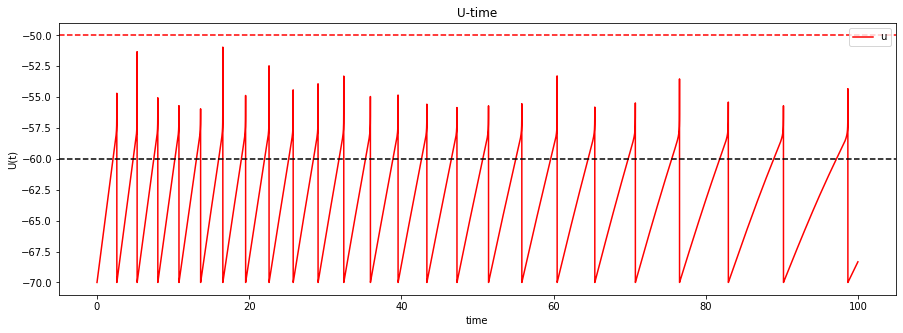

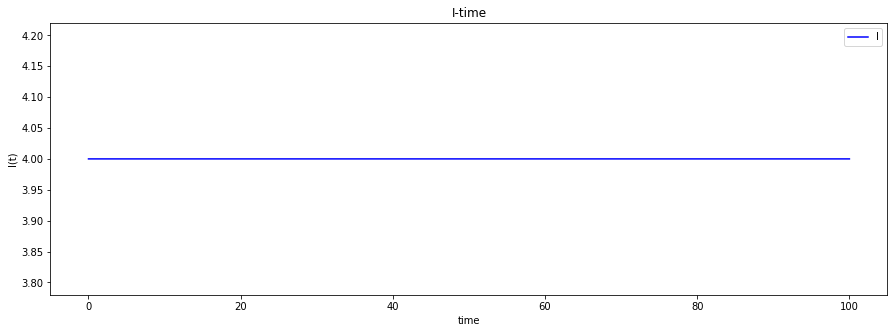

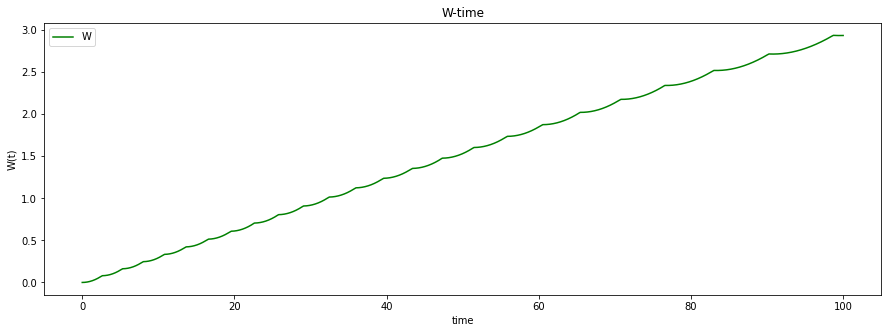

In [ ]:
init_variables()
enter_I(0,T+dt,4)
simulate()
data = make_dataframe()
plot(data)

<Figure size 1800x1080 with 0 Axes>

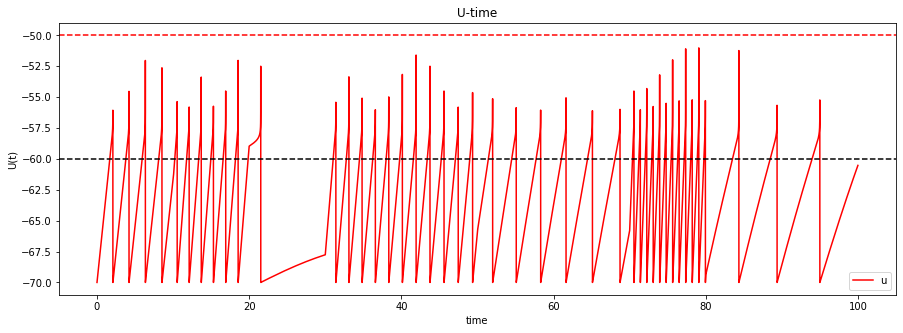

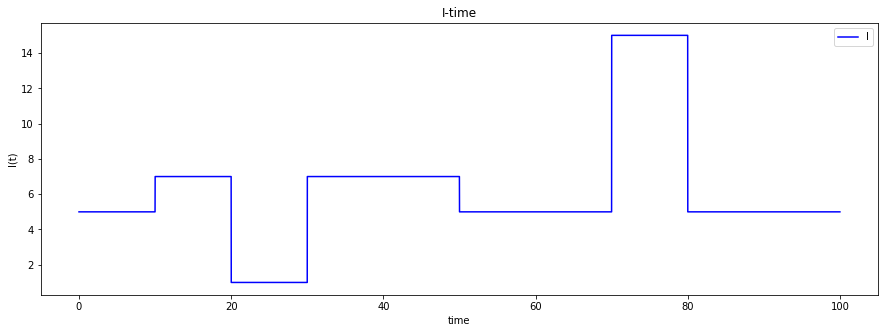

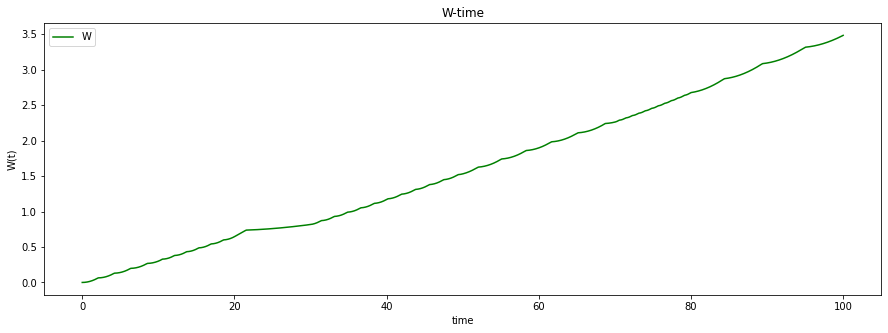

In [ ]:
init_variables()
enter_I(0,T+dt,5)
enter_I(10,50,2)
enter_I(20,30,-6)
enter_I(70,80,10) 
simulate()
data = make_dataframe()
plot(data)

In [ ]:
init_variables()
enter_I(10,T+dt,1)
simulate()
data1 = make_dataframe()

init_variables()
enter_I(20,T+dt,3)
simulate()
data2 = make_dataframe()

init_variables()
enter_I(40,T+dt,6)
simulate()
data3 = make_dataframe()

init_variables()

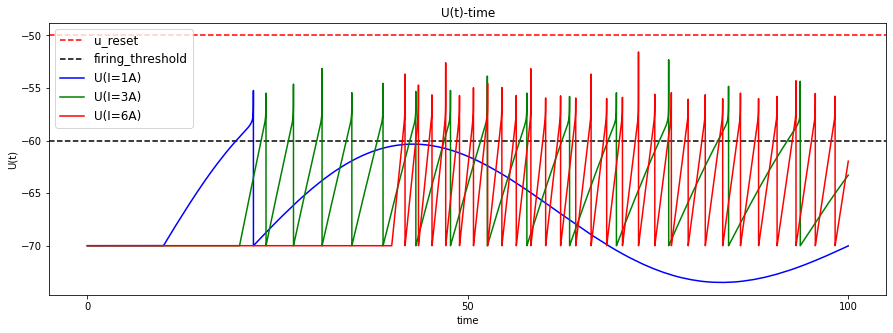

In [ ]:
ax = plt.gca(title = 'U(t)-time')
plt.axhline(y=u_reset , color='red', linestyle='--')
plt.axhline(y=firing_threshold , color='black', linestyle='--')
data1.plot(kind='line',y='u',color='blue',ax=ax,figsize=(15,5) ,xticks= range(0,1050,50)).set_ylabel('U(t)')
data2.plot(kind='line',y='u', color='green', ax=ax)
data3.plot(kind='line',y='u', color='red', ax=ax)
ax.legend(["u_reset","firing_threshold","U(I=1A)", "U(I=3A)" , "U(I=6A)"],prop={'size': 12},loc='upper left')

plt.show()

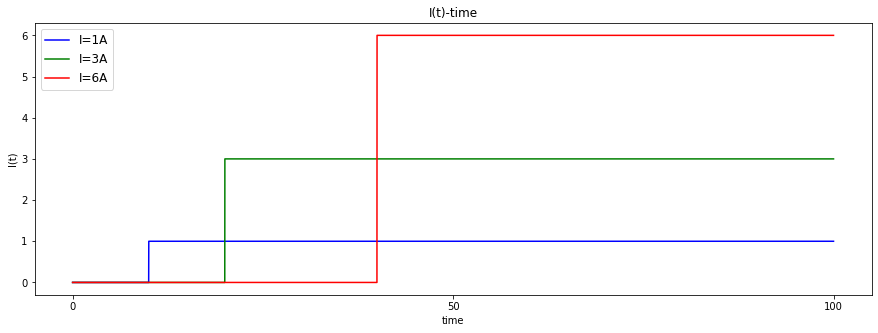

In [ ]:
ax = plt.gca(title = 'I(t)-time')
data1.plot(kind='line',y='I',color='blue',ax=ax ,figsize=(15,5),yticks= range(0,10,1),xticks= range(0,1050,50)).set_ylabel('I(t)')
data2.plot(kind='line',y='I', color='green', ax=ax)
data3.plot(kind='line',y='I', color='red', ax=ax)

ax.legend(["I=1A", "I=3A" , "I=6A"],prop={'size': 12},loc='upper left')

plt.show()

Arbitrary input

In [ ]:
T       =   40.00             
dt      =   0.05                   
time    =   np.arange(0, T+dt, dt)      
R       =    120
t_m     =    100
t_w     =    100
u_rest  =    -70
delta_t =    0.3
I       =    np.zeros(len(time))
W     =    np.zeros(len(time)+1)
U       =    np.empty(len(time)+1)
firing_threshold = -60
u_reset = -50
a = 0.5
b = 0.001

In [ ]:
def init_variables_arbitrary():
    global I      
    I = np.zeros(len(time))
    global U 
    U = np.empty(len(time)+1)

In [ ]:
def simulate_arbitrary(): 
  global W
  global U
  sum = 0
  spike_counter =0
  U[0] = u_rest
  W[0] = 0  

  for i,t in enumerate(time):
    W[i+1] = W[i] + ( (dt/t_w)* ( (a *(U[i]-u_rest)) - W[i] + (b *t_w * spike_counter) )  )
    U[i+1] = U[i]+ ( (dt/t_m)* ( (R*I[i])- (U[i]-u_rest) -(R* W[i] )+( delta_t * np.exp( (U[i]- firing_threshold)/delta_t ) ) ) )
    
    if U[i+1] > u_reset :
      U[i+1] = u_rest
      spike_counter = spike_counter +1
    elif U[i+1] < -100:
      U[i+1] = -100

In [ ]:
def enter_I_arbitrary(start_time, end_time, I_input):
    start  = int(start_time/dt)
    end = int(end_time/dt)
    n = int(T/dt)
    
    if start > n:
        start = n+1
        
    if end > n:
        end = n+1
    
    I[start:end]  =  I[start:end] + I_input

In [ ]:
def make_dataframe_arbitrary():
    data = pd.DataFrame(data = {'u': U[0:U.size - 1] , 'time':time , 'I':I})
    data['u'] = data['u'].round(4)
    data = data.set_index('time')
    return data

In [ ]:
def plot_arbitrary(data):
    
    fig, axes = plt.subplots(nrows=0, ncols=0,figsize=(25,15))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line',y='u',color='red'
            ,title = 'U-time',figsize=(15,5)).set_ylabel('U(t)')  
    plt.axhline(y=firing_threshold, color='black', linestyle='--')
    plt.axhline(y=u_reset, color='red', linestyle='--')
    plt.show()

    f2 = data.plot(kind='line',y='I',color='blue'
            ,title = 'I-time',figsize=(15,5)).set_ylabel('I(t)')

<Figure size 1800x1080 with 0 Axes>

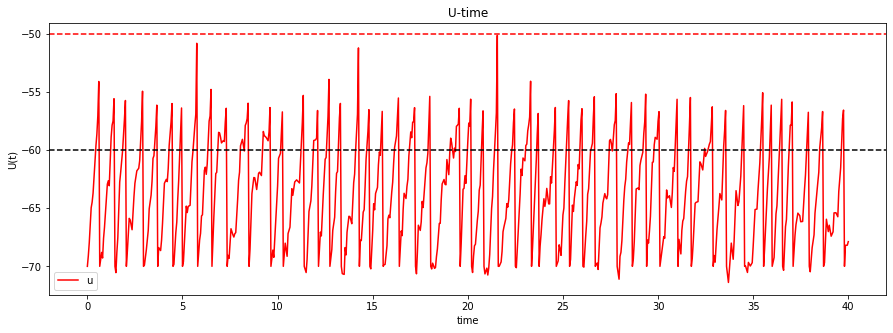

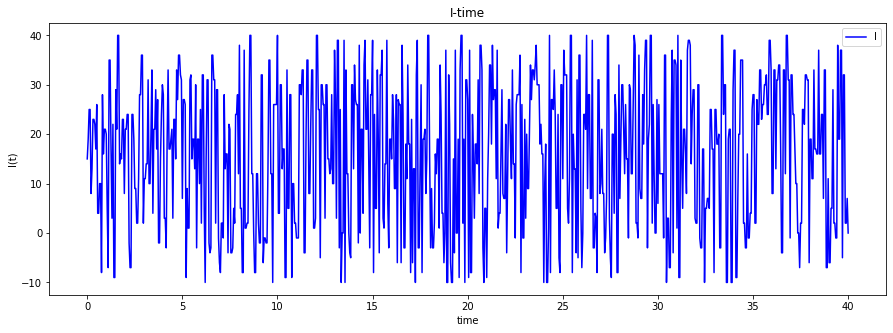

In [ ]:
init_variables_arbitrary()
n = 1
U[0] = u_rest
for i in range(0,int(T/(n*dt))):
    I_random = round(randint(-10,40),3)
    enter_I_arbitrary(round(i*(n*dt),4),round((i+1)*(n*dt),4),I_random)
simulate_arbitrary()
data = make_dataframe_arbitrary()
plot_arbitrary(data)